# RBF-Network interpolation examples

In [6]:
from scipy import *
from scipy.linalg import norm, pinv
from matplotlib import pyplot as plt
import numpy as np

class RBFN:
     
    def __init__(self, indim, numCenters, outdim, time):
        self.indim = indim
        self.outdim = outdim
        self.numCenters = numCenters
        #not sure if it is right
        self.centers = np.linspace(0, time, numCenters)
        # self.centers = [random.uniform(-1, 1, indim) for i in range(numCenters)]
        self.beta = 8
        self.W = random.random((self.numCenters, self.outdim))
         
    def _basisfunc(self, c, d):
        return exp(-self.beta * norm(c-d)**2)
     
    def _calcAct(self, X):
        # calculate activations of RBFs
        G = zeros((X.shape[0], self.numCenters), float)
        for ci, c in enumerate(self.centers):
            for xi, x in enumerate(X):
                G[xi,ci] = self._basisfunc(c, x)
        return G
    
    """def train(self, X, Y):         
        # choose random center vectors from training set
        rnd_idx = random.permutation(X.shape[0])[:self.numCenters]
        self.centers = [X[i,:] for i in rnd_idx]
        # print ("center", self.centers)
        # calculate activations of RBFs
        G = self._calcAct(X)
        # print (G)
        # calculate output weights (pseudoinverse)
        self.W = dot(pinv(G), Y)"""
    
    def test(self, X):
        """ X: matrix of dimensions n x indim """
        G = self._calcAct(X)
        Y = dot(G, self.W)
        return Y
    
    def setHyperParams(self, W):
        assert W.shape[0] == self.numCenters
        assert W.shape[1] == self.outdim
        self.W = W
        
    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def calOutput(self, X):
        """ X: 1 x indim """
        #calculate activation value
        G = self._calcAct(X)
        #sum up and normalize
        Y = dot(G, self.W)/sum(G)
        Y = self._sigmoid(Y)
        return Y
 
      
if __name__ == '__main__':
    
    time = 10
    rbfn = RBFN(1, 10, 3, time)
    W = random.random((rbfn.numCenters, rbfn.outdim))
    rbfn.setHyperParams(W)
    
    point = np.array([5])
    priorities = rbfn.calOutput(point)
    a = ones((1,6))
    a = np.concatenate((a, ones((1,6))))
    a = np.concatenate((a, ones((1,6))))
    print(priorities)
    print(a)
    print(dot(a*priorities))
    
    # print(W)
    '''x = np.arange(0, time, 0.005)
    y = zeros((0,3))
    for point in x:
        point = np.array([point])
        y = np.concatenate((y, rbfn.calOutput(point)))

    plt.figure(figsize=(12, 8))
    # print(y.shape)
    y = np.transpose([y])
    # print(y.shape)
    plt.plot(x, y[1], 'k-')'''
    

[[0.61213223 0.60959215 0.64447328]]
[[1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1.]]


ValueError: operands could not be broadcast together with shapes (3,6) (1,3) 

## 1D interpolation example

In [195]:
from scipy import *
from scipy.linalg import norm, pinv
a=ones(3)
print(a)
print(sum(a))
print(a/sum(a))
a = random.random((4,3))
a
len(a)
a.shape[0]
a.shape[1]
y = ones(0)
y = np.append(arr=y, values=10)
y = np.append(arr=y, values=1)

len(y)
y

[1. 1. 1.]
3.0
[0.33333333 0.33333333 0.33333333]


array([10.,  1.])

## 2D interpolation example

[-10.          -7.77777778  -5.55555556  -3.33333333  -1.11111111
   1.11111111   3.33333333   5.55555556   7.77777778  10.        ]
[4.53978687e-05 4.18766684e-04 3.85103236e-03 3.44451957e-02
 2.47663801e-01 7.52336199e-01 9.65554804e-01 9.96148968e-01
 9.99581233e-01 9.99954602e-01]


array([[0.10786521, 0.00533426, 0.61402899],
       [0.33199609, 0.48030543, 0.99112918],
       [0.94250576, 0.70151296, 0.1836751 ],
       [0.91782393, 0.54015141, 0.1907095 ]])

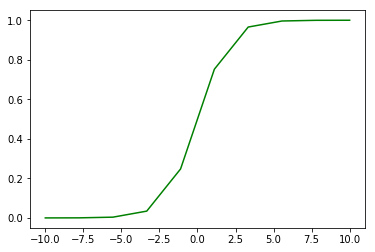

In [162]:
import numpy as np
from matplotlib import pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


x = np.linspace(-10, 10, 10)
print(x)
Y = sigmoid(x)
print(Y)
plt.plot(x, Y, 'g-')
a